In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [13]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [14]:
#k = np.linspace(0.001,0.9,30)
k = np.linspace(0.001,0.9,10)

gap_current_HH = np.loadtxt('gap_current4/gap_current_HH.txt')
gap_current_mean_HH = np.loadtxt('gap_current4/gap_current_mean_HH.txt')
variance_HH = np.loadtxt('gap_current4/gap_current_variance_HH.txt')
noise_variance_HH = np.loadtxt('gap_current4/noise_variance_HH.txt')
chi_HH = np.loadtxt('gap_current4/chi_HH.txt')
rel_HH = np.loadtxt('gap_current4/rel_HH.txt')
data_HH = np.loadtxt('gap_current4/data_HH.txt')

gap_current_IF = np.loadtxt('gap_current4/gap_current_IF.txt')
gap_current_mean_IF = np.loadtxt('gap_current4/gap_current_mean_IF.txt')
variance_IF = np.loadtxt('gap_current4/gap_current_variance_IF.txt')
noise_variance_IF = np.loadtxt('gap_current4/noise_variance_IF.txt')
chi_IF = np.loadtxt('gap_current4/chi_IF.txt')
rel_IF = np.loadtxt('gap_current4/rel_IF.txt')
data_IF = np.loadtxt('gap_current4/data_IF.txt')

gap_current_IZH = np.loadtxt('gap_current4/gap_current_IZH.txt')
gap_current_mean_IZH = np.loadtxt('gap_current4/gap_current_mean_IZH.txt')
variance_IZH = np.loadtxt('gap_current4/gap_current_variance_IZH.txt')
noise_variance_IZH = np.loadtxt('gap_current4/noise_variance_IZH.txt')
chi_IZH = np.loadtxt('gap_current4/chi_IZH.txt')
rel_IZH = np.loadtxt('gap_current4/rel_IZH.txt')

gap_current_ML = np.loadtxt('gap_current4/gap_current_ML.txt')
gap_current_mean_ML = np.loadtxt('gap_current4/gap_current_mean_ML.txt')
variance_ML = np.loadtxt('gap_current4/gap_current_variance_ML.txt')
noise_variance_ML = np.loadtxt('gap_current4/noise_variance_ML.txt')
chi_ML = np.loadtxt('gap_current4/chi_ML.txt')
rel_ML = np.loadtxt('gap_current4/rel_ML.txt')

(5000.0, 7000.0)

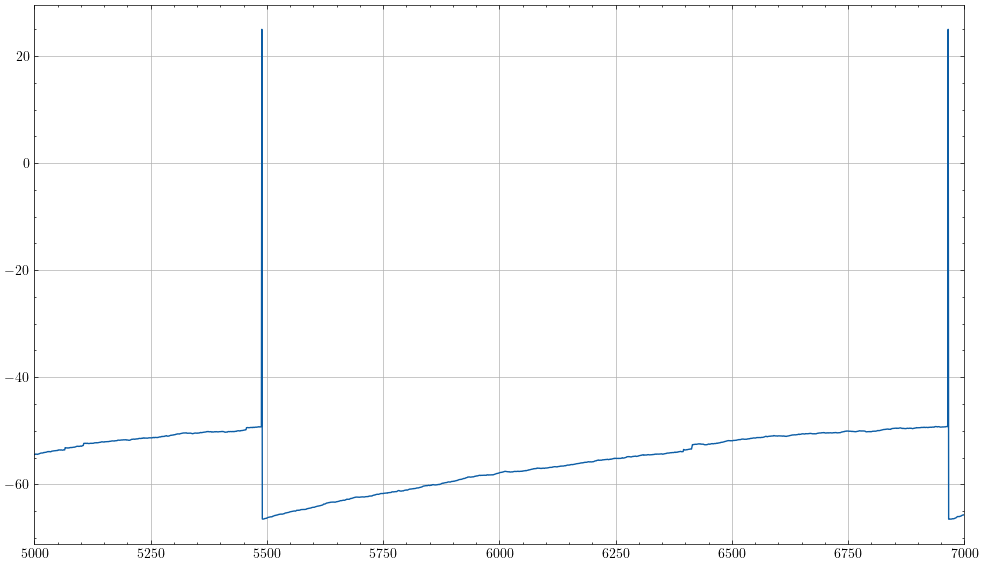

In [15]:
plt.plot(data_IF[1])
#plt.plot(data_HH[8])
plt.xlim(5000,7000)

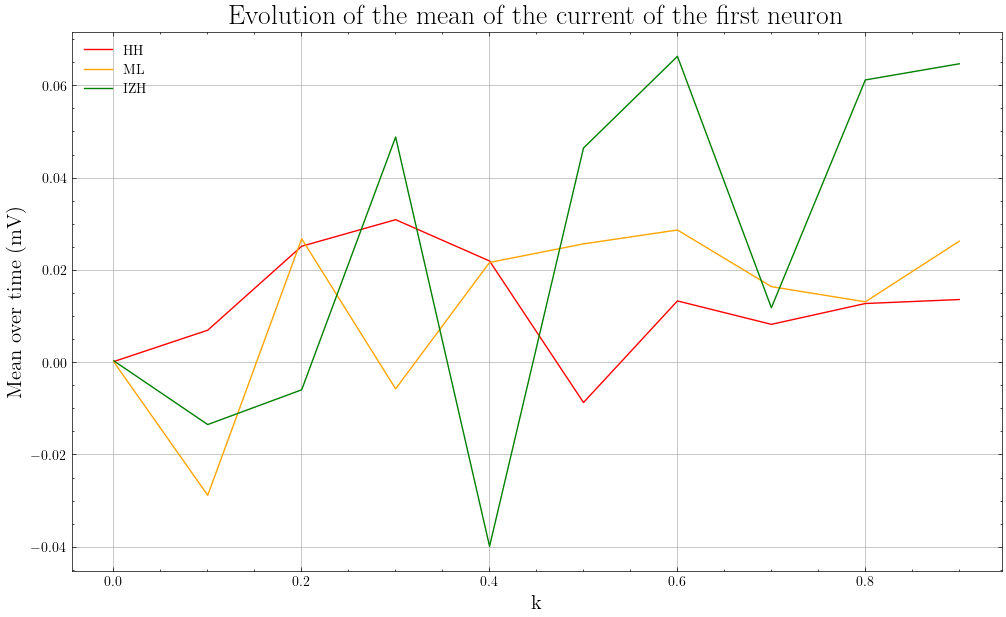

In [16]:
plt.title('Evolution of the mean of the current of the first neuron', fontsize=20)
plt.plot(k,gap_current_HH,label='HH',color='r')
#plt.plot(k,gap_current_IF,label='IF',color='b')
plt.plot(k,gap_current_ML,label='ML',color='orange')
plt.plot(k,gap_current_IZH,label='IZH',color='g')
plt.xlabel('k')
plt.ylabel('Mean over time (mV)')
plt.legend()

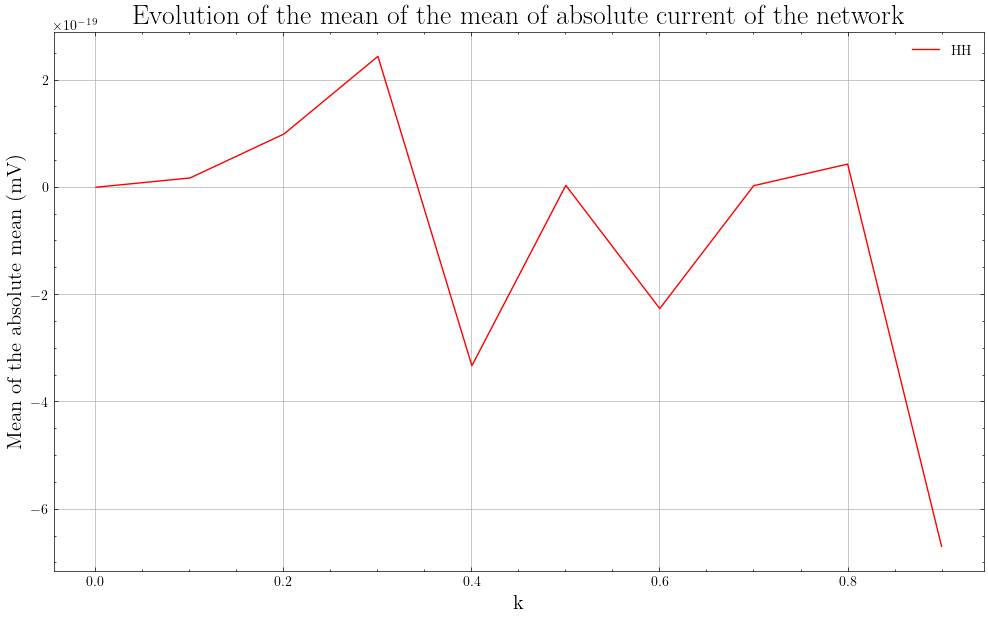

In [17]:
plt.title('Evolution of the mean of the mean of absolute current of the network', fontsize=20)
plt.plot(k,gap_current_mean_HH,label='HH',color='r')
#plt.plot(k,gap_current_mean_IF,label='IF',color='b')
#plt.plot(k,gap_current_mean_ML,label='ML',color='orange')
#plt.plot(k,gap_current_mean_IZH,label='IZH',color='g')
plt.xlabel('k')
plt.ylabel('Mean of the absolute mean (mV)')
plt.legend()

In [18]:
import matplotlib

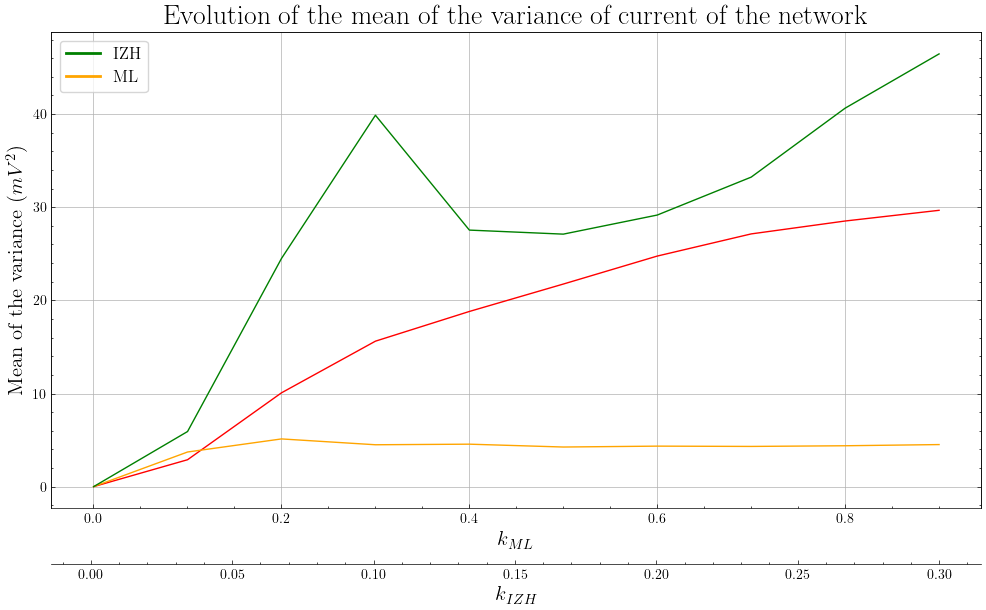

In [19]:

k_izh = np.linspace(0.001,0.3,10)
fig, ax = plt.subplots()
ax.set_ylabel(r'Mean of the variance ($mV^2$)')
newax = ax.twiny()
fig.subplots_adjust(bottom=0.20)
newax.set_frame_on(True)
newax.patch.set_visible(False)
newax.xaxis.set_ticks_position('bottom')
newax.xaxis.set_label_position('bottom')
newax.spines['bottom'].set_position(('outward', 40))

plt.title('Evolution of the mean of the variance of current of the network', fontsize=20)
ax.plot(k,variance_HH,label='HH',color='r')
#ax.plot(k,variance_IF,label='IF',color='b')
ax.plot(k,variance_ML,label='ML',color='orange')
newax.plot(k_izh,variance_IZH,label='IZH',color='g')
newax.grid()
ax.set_xlabel(r'$k_{ML}$')
newax.set_xlabel(r'$k_{IZH}$')
custom_lines = [matplotlib.lines.Line2D([0], [0], color='green', lw=2),
                matplotlib.lines.Line2D([0], [0], color='orange', lw=2)]

plt.legend(custom_lines, ['IZH', 'ML'],ncols=1,frameon=True,prop={'size':12})

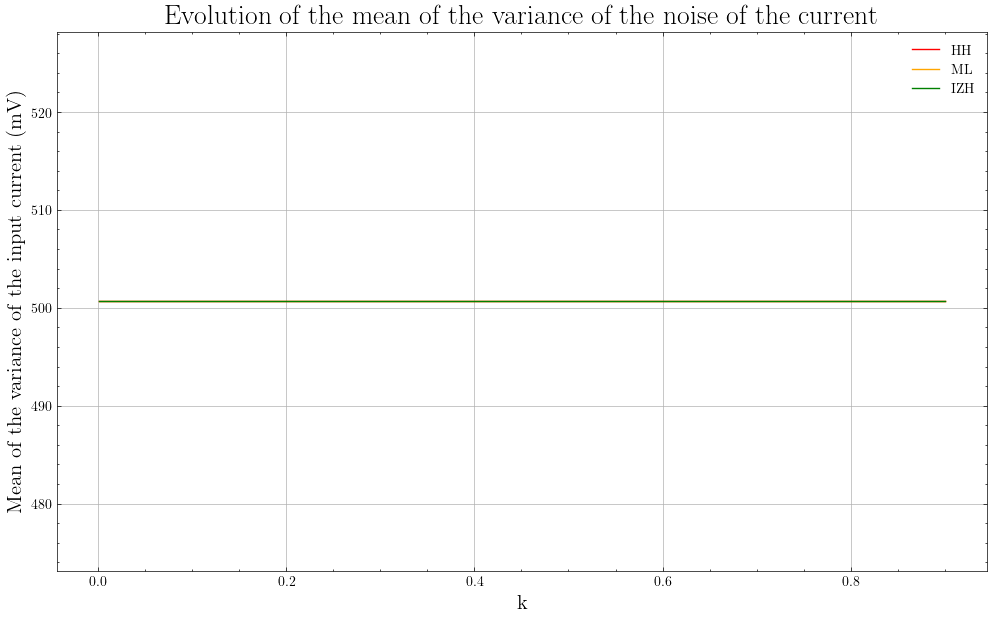

In [20]:
plt.title('Evolution of the mean of the variance of the noise of the current', fontsize=20)
plt.plot(k,noise_variance_HH,label='HH',color='r')
#plt.plot(k,noise_variance_IF,label='IF',color='b')
plt.plot(k,noise_variance_ML,label='ML',color='orange')
plt.plot(k,noise_variance_IZH,label='IZH',color='g')
plt.xlabel('k')
plt.ylabel('Mean of the variance of the input current (mV)')
plt.legend()

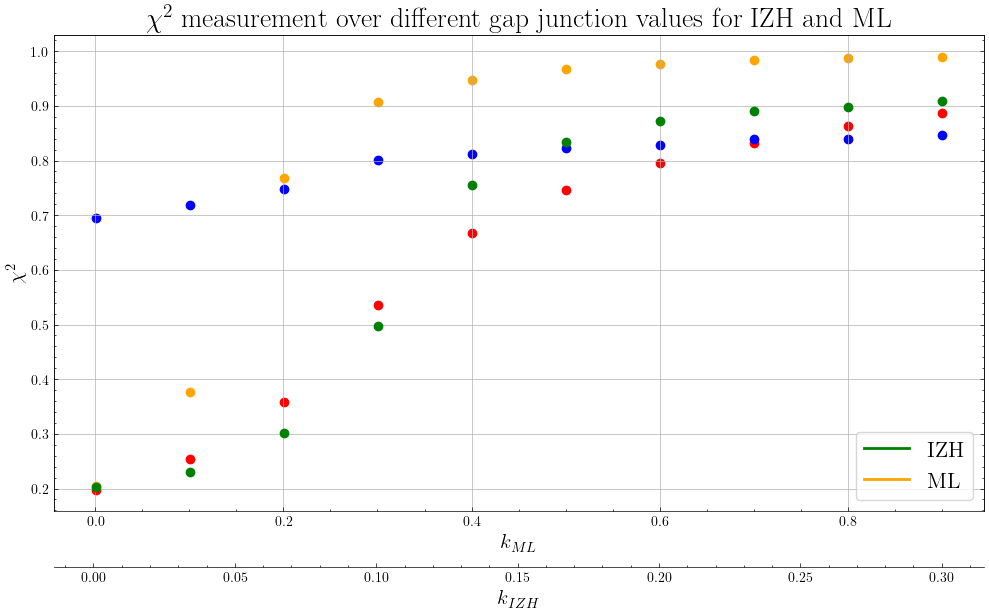

In [21]:
k_izh = np.linspace(0.001,0.3,10)
fig, ax = plt.subplots()
ax.set_ylabel(r'$\chi^2$')
newax = ax.twiny()
fig.subplots_adjust(bottom=0.20)
newax.set_frame_on(True)
newax.patch.set_visible(False)
newax.xaxis.set_ticks_position('bottom')
newax.xaxis.set_label_position('bottom')
newax.spines['bottom'].set_position(('outward', 40))

plt.title(r'$\chi^2$ measurement over different gap junction values for IZH and ML', fontsize=20)
ax.scatter(k,chi_HH,label='HH',color='r')
ax.scatter(k,chi_IF,label='IF',color='b')
ax.scatter(k,chi_ML,label='ML',color='orange')
newax.scatter(k_izh,chi_IZH,label='IZH',color='g')
newax.grid()
ax.set_xlabel(r'$k_{ML}$')
newax.set_xlabel(r'$k_{IZH}$')
custom_lines = [matplotlib.lines.Line2D([0], [0], color='green', lw=2),
                matplotlib.lines.Line2D([0], [0], color='orange', lw=2)]

plt.legend(custom_lines, ['IZH', 'ML'],ncols=1,frameon=True,prop={'size':16},loc='lower right')

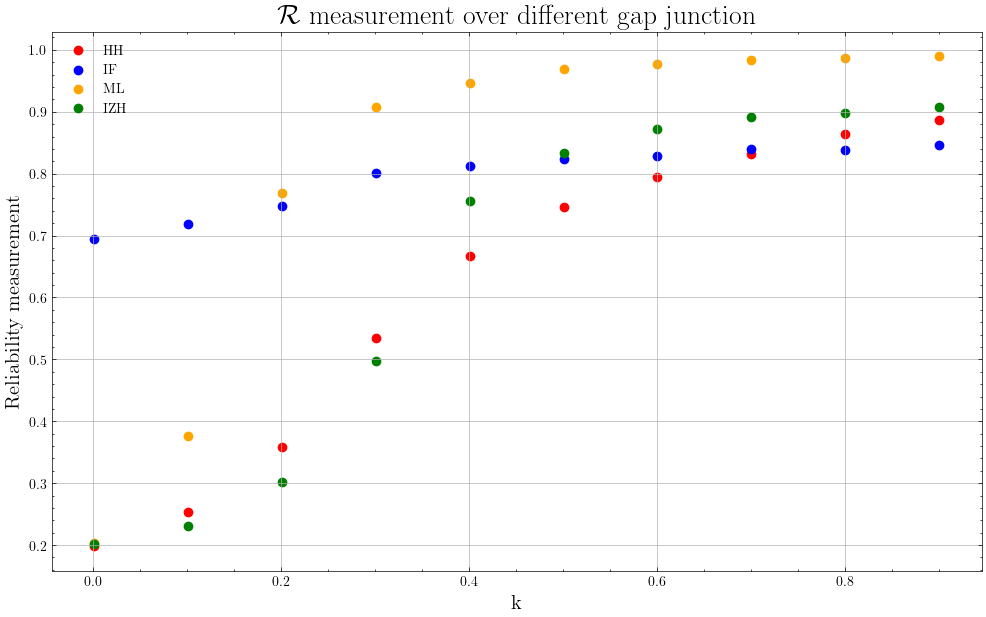

In [22]:
plt.title(r'$\mathcal{R}$ measurement over different gap junction', fontsize=20)
plt.scatter(k,chi_HH,label='HH',color='r')
plt.scatter(k,chi_IF,label='IF',color='b')
plt.scatter(k,chi_ML,label='ML',color='orange')
plt.scatter(k,chi_IZH,label='IZH',color='g')
plt.xlabel('k')
plt.ylabel('Reliability measurement')
plt.legend()